In [1]:
import numpy as np
import os, sys
import matplotlib.pyplot as plt

%matplotlib ipympl

In [2]:
# Extract data from Numpy files
chem_avg_savename = 'extracted_chemistry_avg.npy'
chem_stddev_savename = 'extracted_chemistry_stddev.npy'
chem_names_savename = 'extracted_chemistry_oxide_names.npy'
chem_spec_names_savename = 'extracted_chemistry_spec_names.npy'
chem_spec_ids_savename = 'extracted_chemistry_spec_ids.npy'


avgs = np.load(chem_avg_savename, allow_pickle=True)
stddevs = np.load(chem_stddev_savename, allow_pickle=True)
names_oxides = np.load(chem_names_savename, allow_pickle=True)
names = np.load(chem_spec_names_savename, allow_pickle=True)
ids = np.load(chem_spec_ids_savename, allow_pickle=True)


print("averages shape: ", avgs.shape)
print("stddevs shape: ", stddevs.shape)
print("oxide names shape: ", names_oxides.shape)
print("spectrum names shape: ", names.shape)
print("spectrum ids shape: ", ids.shape)

averages shape:  (1315, 18)
stddevs shape:  (1315, 18)
oxide names shape:  (18,)
spectrum names shape:  (1315,)
spectrum ids shape:  (1315,)


In [3]:
# Look at the sums of the oxides to see if any greater than 100 or close to 0
total_wt_percent = np.sum(avgs, axis=1)
idxs_gt_100 = np.where(total_wt_percent > 101)

spec_wt_percent_gt_100 = total_wt_percent[idxs_gt_100]
spec_names_gt_100 = names[idxs_gt_100]
spec_ids_gt_100 = ids[idxs_gt_100]
spec_avgs_gt_100 = avgs[idxs_gt_100]

idxs_nan = np.where(np.isnan(total_wt_percent))[0]
print("NaN idxs: ", idxs_nan)

name_str = ", ".join("{}".format(n) for n in names_oxides)
#print(name_str)

print("{}\t{}\t{}".format("weight %", "sample id", "sample name"))

for i in range(len(spec_names_gt_100)):
    spec_name = spec_names_gt_100[i]
    spec_id = spec_ids_gt_100[i]
    spec_wt_percent = spec_wt_percent_gt_100[i]
    spec_avg = spec_avgs_gt_100[i]
    
    print("{:.4f}\t{}  \t{}".format(spec_wt_percent, spec_id, spec_name))
    
    #for j in range(len(names_oxides)):
    #    print("{}\t{:.4f}".format(names_oxides[j], spec_avg[j]))


NaN idxs:  []
weight %	sample id	sample name
101.2000	X050014  	Albite
101.4229	R050350-2  	Glauberite
101.0130	R100107-2  	Monticellite
101.7446	R060556-2  	Sapphirine
101.4857	R060787-2  	Sillimanite


In [7]:
# Look at the sums of the oxides to see if any less than threshold ~50
wt_percent_threshold = 50
total_wt_percent = np.sum(avgs, axis=1)
idxs_lt = np.where(total_wt_percent < wt_percent_threshold)

spec_wt_percent_lt = total_wt_percent[idxs_lt]
spec_names_lt = names[idxs_lt]
spec_ids_lt = ids[idxs_lt]
spec_avgs_lt = avgs[idxs_lt]

print("NEED TO REMOVE LOW TOTAL WT % SAMPLES")
print("Number of samples < {}% total wt%: {}".format(wt_percent_threshold, len(spec_names_lt)))

print("\n{}\t{}\t{}".format("weight %", "sample id", "sample name"))
name_str = ", ".join("{}".format(n) for n in names_oxides)


for i in range(len(spec_names_lt)):
    spec_name = spec_names_lt[i]
    spec_id = spec_ids_lt[i]
    spec_wt_percent = spec_wt_percent_lt[i]
    spec_avg = spec_avgs_lt[i]
    
    print("{:.4f}\t\t{}  \t{}".format(spec_wt_percent, spec_id, spec_name))
    
    #for j in range(len(names_oxides)):
    #    print("{}\t{:.4f}".format(names_oxides[j], spec_avg[j]))


NEED TO REMOVE LOW TOTAL WT % SAMPLES
Number of samples < 50% total wt%: 485

weight %	sample id	sample name
0.0000		R070007-2  	Abelsonite
41.2900		R060687-2  	Adelite
33.4640		R060312-2  	AeschyniteY
0.0000		R070296-2  	Afwillite
39.8678		R060711-2  	AgarditeY
43.0958		R060924-2  	AgarditeY
48.5803		R070357-2  	AgarditeY
0.0000		R070174-2  	Alabandite
0.0000		R070011-2  	Aleksite
14.9600		R050483-2  	Alstonite
0.0000		R060939-2  	Altaite
4.8400		R060218-2  	AncyliteCe
0.4300		R050462-2  	Annabergite
0.0000		R050654-2  	Antimony
0.0000		R050437-2  	Argyrodite
0.0000		R050653-2  	Arsenic
46.1683		R070144-2  	Arseniopleite
48.3320		R070166-2  	Arseniopleite
0.1100		R060680-2  	Arsenolamprite
0.0100		R050383-2  	Arsenolite
0.0000		R061082-2  	Arsenopyrite
0.0000		R070585-2  	Arsenopyrite
47.2400		R060234-2  	Artinite
0.0000		R060923-2  	Aurostibite
0.0000		R061020-2  	Awaruite
0.3600		R060016-2  	Baddeleyite
0.2800		R060078-2  	Baddeleyite
33.6600		R050627-2  	Bahianite
33.3759		R060433-

In [9]:
# Check iron to see if both FeO and Fe2O3 are high b/c some excel files recalculate oxide % for FeO and Fe2O3 
# We will combine and use FeOT only
fe2o3 = avgs[:,-2]
feo = avgs[:,-1]
idxs_fe = np.where((fe2o3 > 0) & (feo > 0))[0]

spec_wt_percent_fe = total_wt_percent[idxs_fe]
spec_names_fe = names[idxs_fe]
spec_ids_fe = ids[idxs_fe]

name_str = "\t".join("{}".format(n) for n in names_oxides)

print("\n{}\t{}\t{}\t\t{}\t{}".format("weight %", "sample id", "sample name", "Fe2O3", "FeO"))


for i in idxs_fe:
    spec_name = names[i]
    spec_id = ids[i]
    spec_wt_percent = total_wt_percent[i]
    spec_fe2o3 = fe2o3[i]
    spec_feo = feo[i]

    print("{:.2f}\t\t{}\t{}\t\t{:.2f}\t{:.2f}".format(spec_wt_percent, spec_id, spec_name[0:15], spec_fe2o3, spec_feo))

for i in idxs_fe:
    spec_name = names[i]
    spec_id = ids[i]
    spec_wt_percent = total_wt_percent[i]
    spec_fe2o3 = fe2o3[i]
    spec_feo = feo[i]

    spec_avg_text = "\t".join(f"{x:.2f}" for x in avgs[i])

    #print("{:.2f}\t\t{}\t{}".format(spec_wt_percent, spec_id, spec_name[0:15]))

    print("\n{}".format(name_str))
    print(spec_avg_text)


weight %	sample id	sample name		Fe2O3	FeO
97.39		R050109-2	Bobdownsite		0.93	0.28
90.87		R061026-2	Cronstedtite		35.29	38.23
85.03		R070599-2	Natrodufrenite		42.73	7.77
93.78		R060858-2	Rockbridgeite		49.52	6.72

SiO2	TiO2	Al2O3	MgO	MnO	CaO	Na2O	K2O	P2O5	ZnO	SnO	Cr2O3	SO3	TeO2	PbO	CuO	Fe2O3	FeO
0.00	0.00	0.51	2.70	0.00	45.86	0.70	0.00	46.40	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.93	0.28

SiO2	TiO2	Al2O3	MgO	MnO	CaO	Na2O	K2O	P2O5	ZnO	SnO	Cr2O3	SO3	TeO2	PbO	CuO	Fe2O3	FeO
17.16	0.01	0.10	0.01	0.02	0.01	0.02	0.01	0.00	0.00	0.00	0.01	0.00	0.00	0.00	0.00	35.29	38.23

SiO2	TiO2	Al2O3	MgO	MnO	CaO	Na2O	K2O	P2O5	ZnO	SnO	Cr2O3	SO3	TeO2	PbO	CuO	Fe2O3	FeO
0.09	0.00	0.33	0.01	0.74	0.54	2.19	0.01	30.61	0.00	0.00	0.01	0.02	0.00	0.00	0.00	42.73	7.77

SiO2	TiO2	Al2O3	MgO	MnO	CaO	Na2O	K2O	P2O5	ZnO	SnO	Cr2O3	SO3	TeO2	PbO	CuO	Fe2O3	FeO
0.41	0.00	0.03	0.33	4.23	0.02	0.06	0.00	32.45	0.00	0.00	0.00	0.01	0.00	0.00	0.00	49.52	6.72


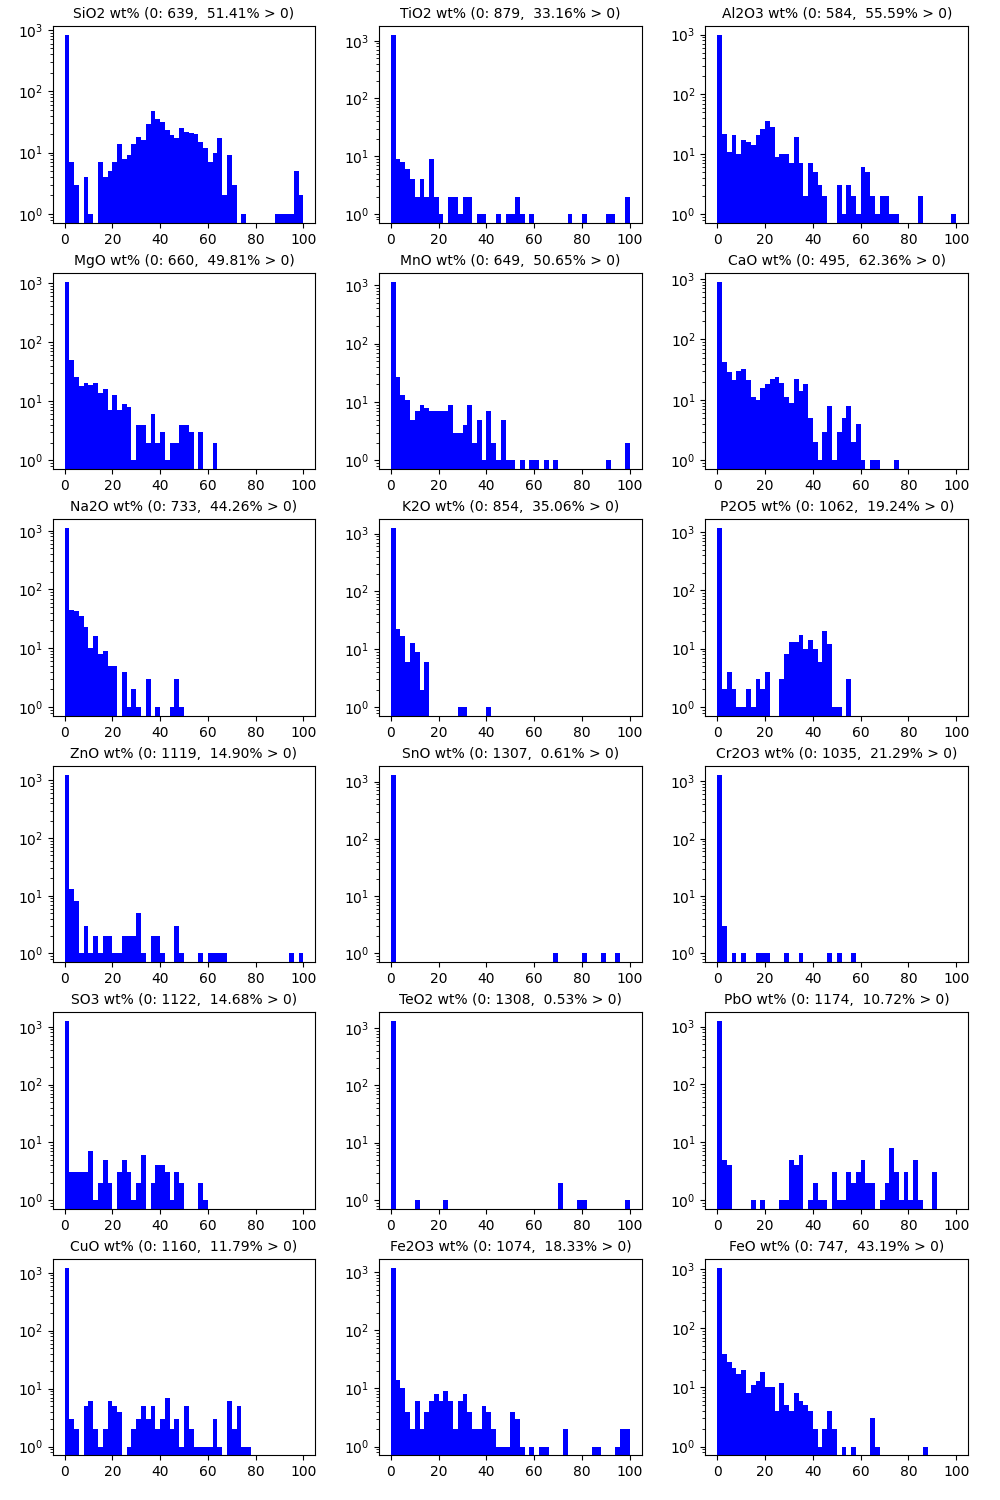

In [10]:
# Plot histograms of oxide wt% distributions (log scale y-axis)

# Find the Fraction of all samples with greater than 0 wt%
fig, axs = plt.subplots(6, 3, figsize=(10, 15))
fig.tight_layout(pad=1.5)

# 2% bins
bins = np.linspace(0, 100, 51)

throw_out = ['SnO', 'TeO2']
combine = ['Fe2O3', 'FeO']

possible_oxides_to_add = ['As2O5', 'SrO', 'PbO', 'BaO', 'La2O3', 'Ce2O3', 'Pr2O3', 'Nd2O3', 'NiO', 'CoO', 'V2O3']

# Loop over the rows and columns
cnt = 0
for i in range(6):
    for j in range(3):
        name = names_oxides[cnt]
        vals = avgs[:, cnt]
        idxs_non_zero = np.where(vals>0)[0]
        num_zero_vals = avgs.shape[0] - len(idxs_non_zero)
        percentage_greater_than_zero = np.sum(vals > 0) / vals.size * 100

        axs[i, j].hist(vals, bins=bins, color='blue')
        axs[i, j].set_title("{} wt% (0: {},  {:.2f}% > 0)".format(name, num_zero_vals, percentage_greater_than_zero), fontsize=10)
        axs[i, j].set_yscale('log')

        cnt += 1
        